In [40]:
import xml.etree.ElementTree as ET
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import models
import torch.optim as optim

## Levantamos las fotos sin predicción

In [41]:
directorio= "Dataset_test_final/turtles/*.jpg"

In [42]:
import cv2
import os


import glob
cv_img = []
for img in glob.glob(directorio):
    n= cv2.imread(img)
    cv_img.append(n)

In [43]:
nombre_imagenes=glob.glob(directorio)
nombre_imagenes[-1][27:]

rango=len(nombre_imagenes)
print(rango)
lista_nombres = []
for i in range(rango):
    cada_una=nombre_imagenes[i][27:]
    lista_nombres.append(cada_una)

lista_nombres[3:5]

98


['1616 i.JPG', '1617 i R.JPG']

In [44]:
# cv_img[1]
# print(cv_img[4].shape[0])

# columns = ['ancho','alto']
# ancho = []
# for i in range(rango):
#     ancho = cv_img[i].shape[0]
#     ancho.append([ancho])

98


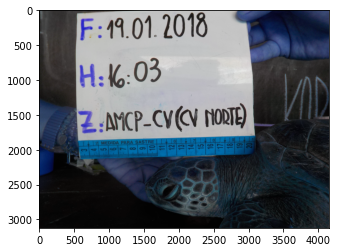

In [46]:
print(len(cv_img))

idx = 8
img = Image.fromarray(cv_img[idx])
plt.imshow(img)

In [47]:
cv_img[idx].shape
len(cv_img)

98

Cambiamos el tamaño

In [48]:
# resize image
dim = (200, 200)

resized_img = []
for i in cv_img:
    resized= cv2.resize(i, dim)
    resized_img.append(resized)
 
print('Resized Dimensions : ',resized_img[8].shape)

Resized Dimensions :  (200, 200, 3)


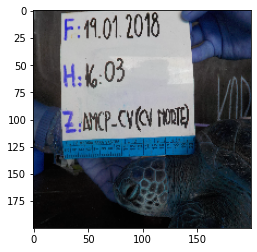

In [49]:
idx = 8
img = Image.fromarray(resized_img[idx])
plt.imshow(img)

## Levantamos el mejor modelo

In [50]:
best_model = models.resnet18(pretrained = True)
best_model.fc = torch.nn.Linear(in_features = 512, out_features = 4, bias = True)

checkpoint = torch.load('outputs/best_model.pth')
best_model.load_state_dict(checkpoint['state_dict'])


optimizer = optim.Adam(best_model.parameters(), lr = 0.001)
optimizer.load_state_dict(checkpoint['optimizer'])

epoch = checkpoint['epoch']
loss = checkpoint['loss']

In [51]:
# indices = np.arange(len(resized_img))

# random_seed = 112
# RandomState(random_seed).shuffle(indices)

# # De la lista mezclada, extraemos los indices correspondiente a cada subconjunto.
# indices_eval1 = indices[0:15]

# dataset_eval1 = torch.utils.data.Subset(resized_img, indices_eval1)

### para una sola imagen 

In [52]:
im1 = resized_img[4]
t = torch.from_numpy(im1)
print(t.shape)

t2=t.permute([2,1,0]).unsqueeze(0)
print(t2.shape)

t2=t2.float()

output= best_model(t2)
type(output)
output

torch.Size([200, 200, 3])
torch.Size([1, 3, 200, 200])


C:\Users\Usuario\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([[ 64.9491, 110.2443, 111.3565, 155.3570]], grad_fn=<AddmmBackward>)

### Corremos la red en todas las fotos

In [53]:
output_list = []
for i in range(len(resized_img)):
    im1 = resized_img[i]
    t = torch.from_numpy(im1)

    t2=t.permute([2,1,0]).unsqueeze(0)
    t2=t2.float()

    output= best_model(t2)
    output_list.append(output)

In [54]:
def create_rect(bb, color='red'):
    """
    
        Crea un objeto matplotlib.patches.Rectangle a partir de las coordenadas de la bounding box.

        Args:
            · bb: coordenadas de las esquinas de la bounding box, en este formato:
            ((xmin,ymin),(xmax,ymax))

    """
    
    bb = bb.detach().numpy()
    

    return plt.Rectangle((bb[0][0], bb[0][1]), bb[1][0] - bb[0][0], bb[1][1] - bb[0][1], color=color,
                         fill=False, lw=3)


def add_bb_to_axes(ax, bb, color='red'):
    """
    
        Toma un handler de una imagen pyplot (ax) y le agrega el bounding box indicado por las coordenadas bb

    """
    
    ax.add_patch(create_rect(bb, color = color))

def show_img_with_bb(im, bb, color='red'):
    """
    
    Muestra una imagen junto con su bounding box    

    """
    ax = plt.gca()
    plt.imshow(im)
    add_bb_to_axes(ax, bb, color)

tensor([[107.7720, 112.6155, 156.9949, 159.0586]])


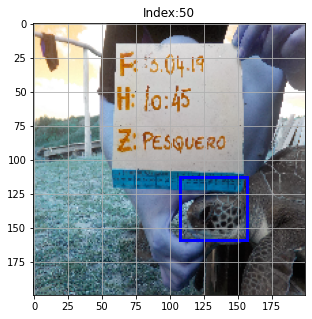

In [55]:
# Cambiar idx para ver diferentes imagenes
idx = 50
from matplotlib.pyplot import imshow
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

# Extraer la imagen y mostrarla
im1 = resized_img[idx]
t = torch.from_numpy(im1)

ax.imshow(t)

t2=t.permute([2,1,0]).unsqueeze(0)
t2=t2.float()

# Calcular la bounding box que predice la red, y la pérdida asociada
with torch.no_grad():
    
    output = best_model(t2)
    # Dibujar la bounding box predicha a la imagen
    bb_inference = output.reshape([2,2])
    add_bb_to_axes(ax, bb_inference, color = 'blue')
    # Mostrar        
    ax.set_title(f"Index:{idx}", fontdict = {'fontsize':12})
    plt.grid(None) 
    print(output)

In [56]:
xmin= output[0:1,0].numpy()[0]
ymin = output[0:1,1].numpy()[0]
xmax= output[0:1,2].numpy()[0]
ymax= output[0:1,3].numpy()[0]

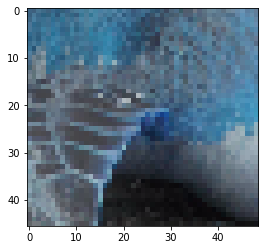

In [57]:
idx = 20
img = Image.fromarray(resized_img[idx])



# Cropped image of above dimension
# (It will not change original image)
im1 = img.crop((xmin, ymin, xmax, ymax))

im1.save('crop', 'png')
# output.close()

# Shows the image in image viewer
plt.imshow(im1)

#Pasar todas las fotos y que recorte 

<ipython-input-58-77828b5f3f02>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5,5))


IndexError: list index out of range

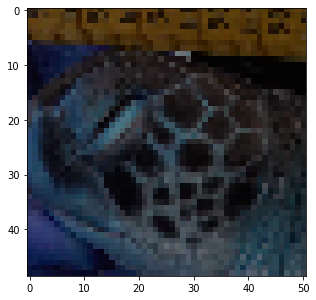

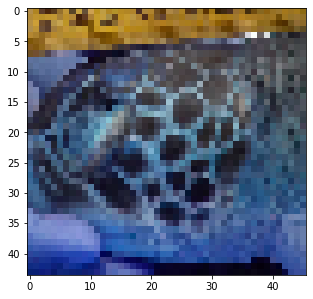

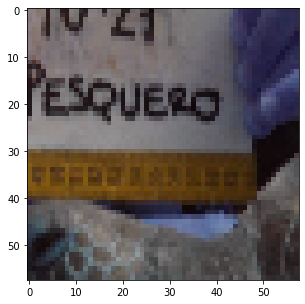

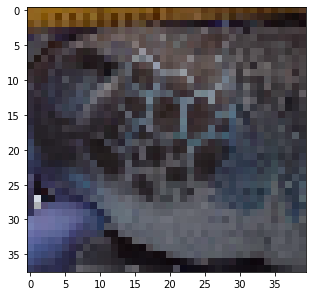

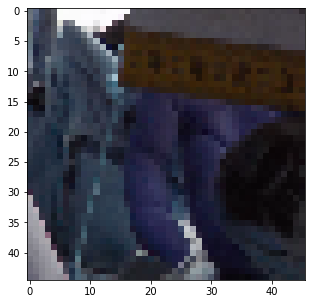

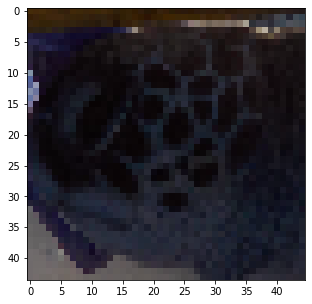

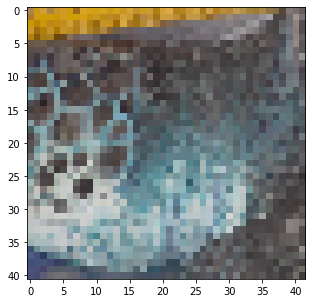

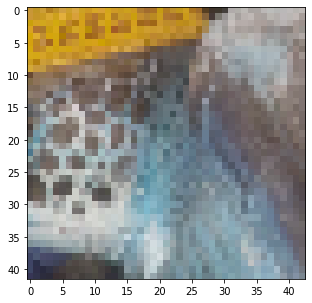

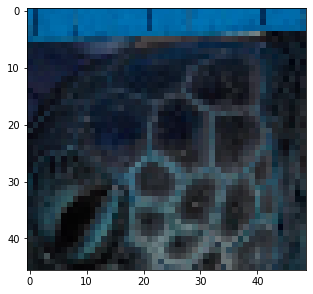

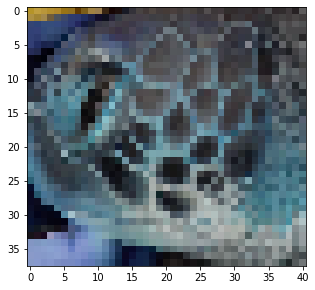

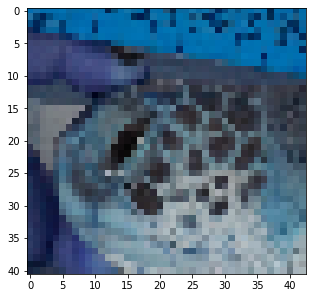

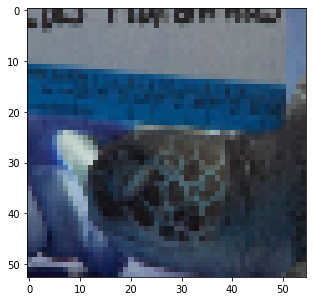

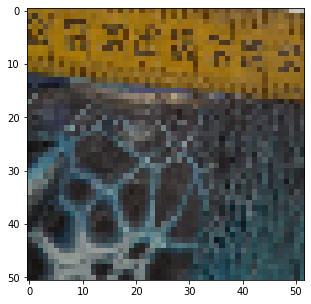

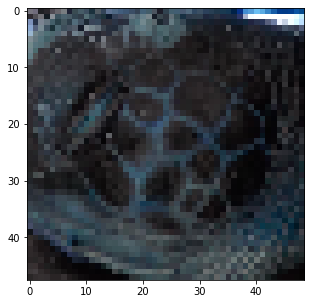

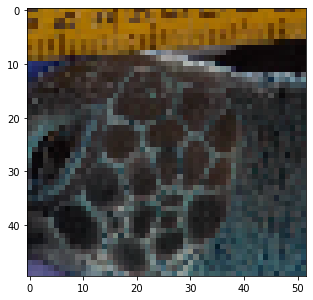

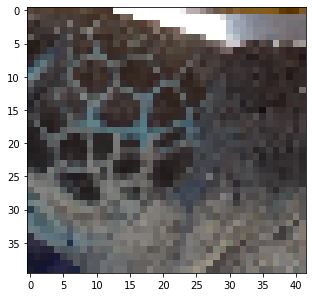

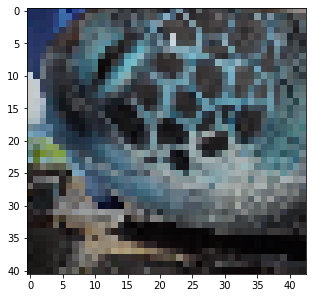

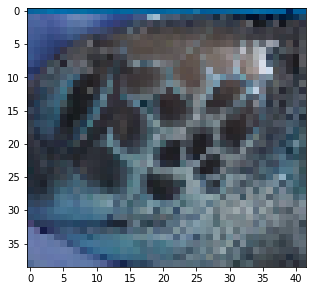

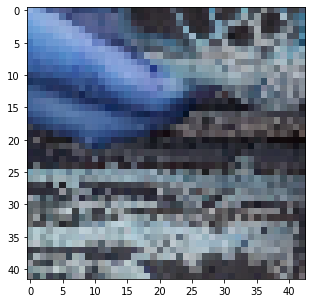

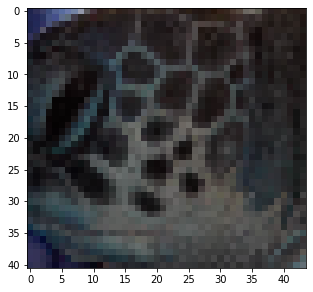

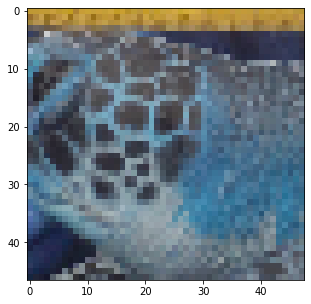

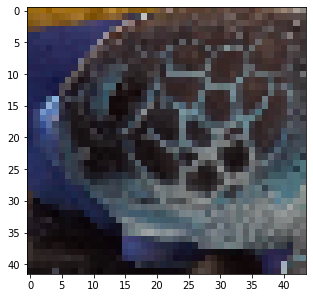

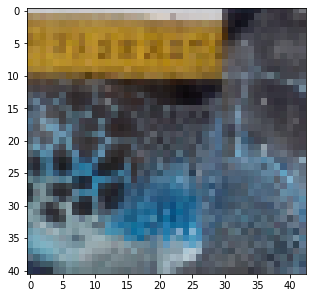

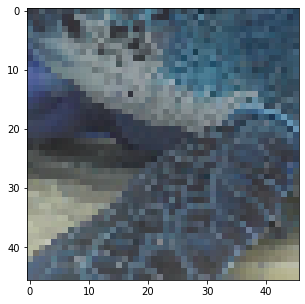

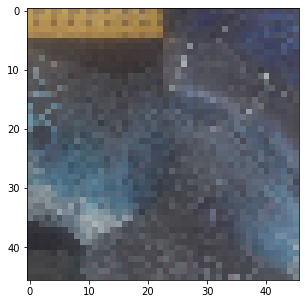

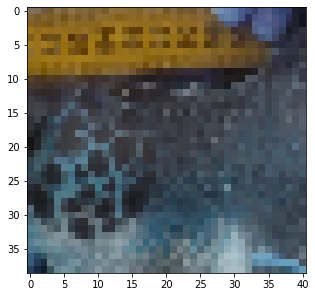

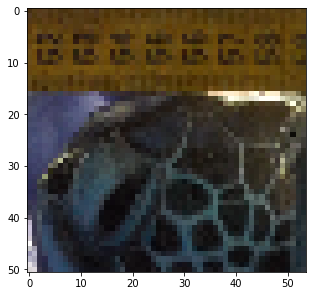

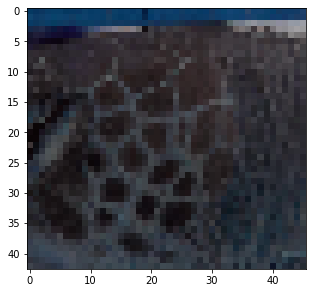

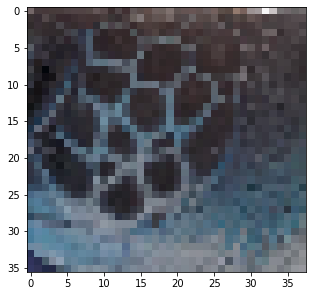

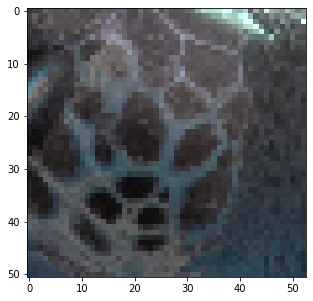

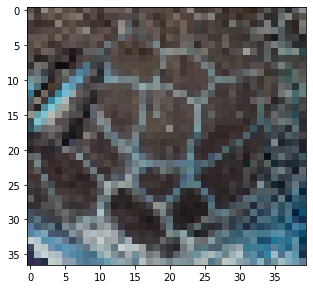

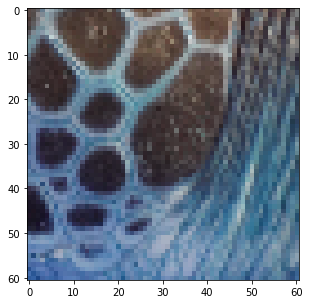

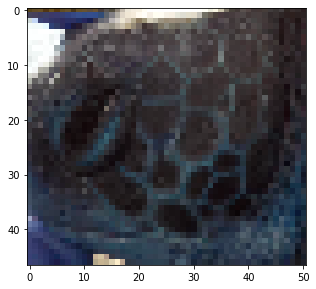

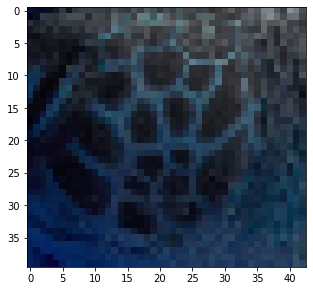

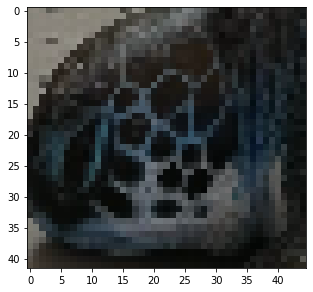

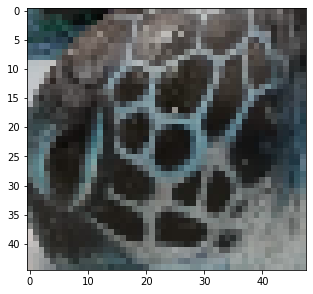

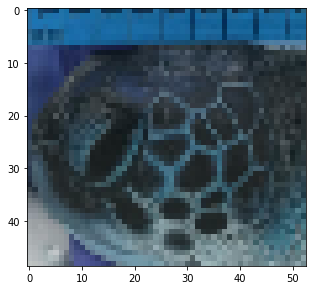

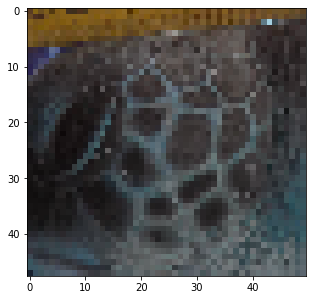

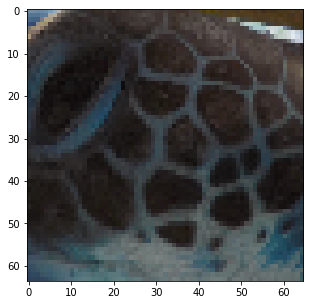

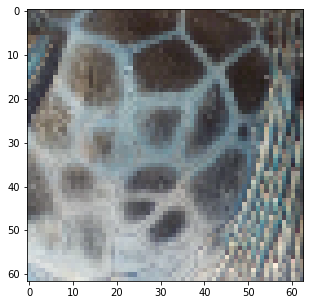

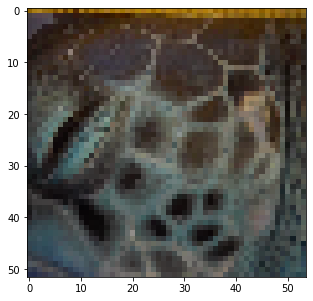

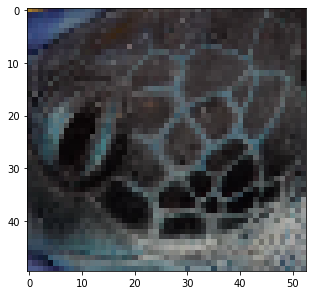

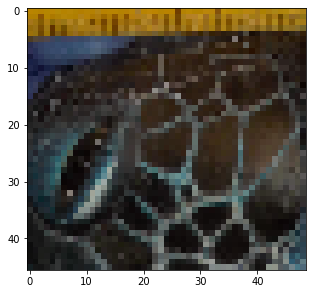

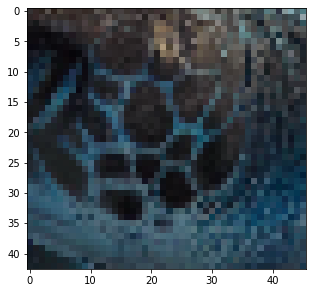

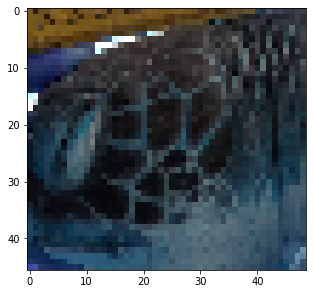

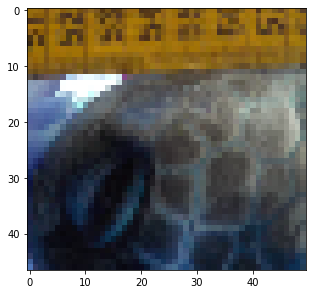

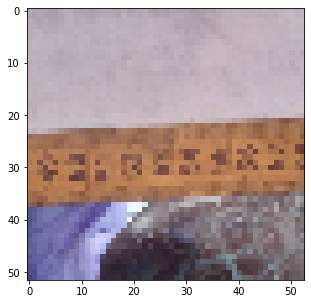

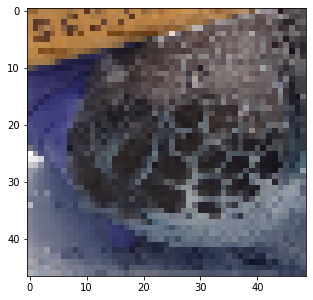

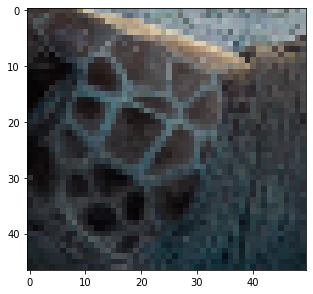

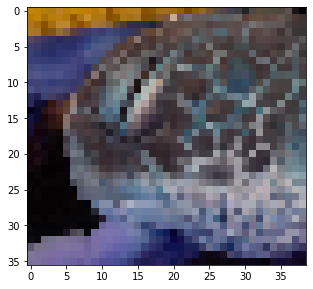

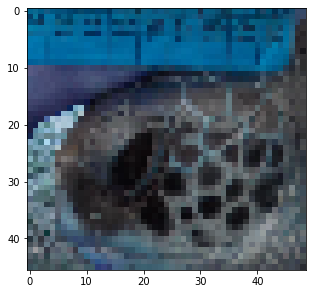

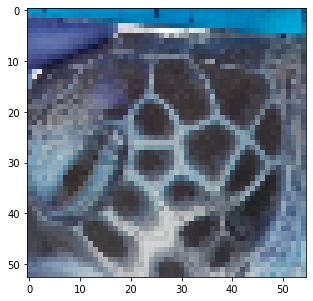

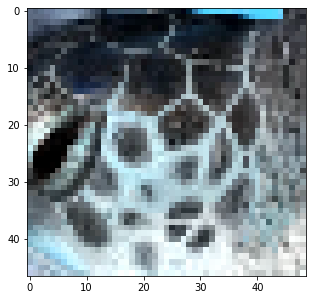

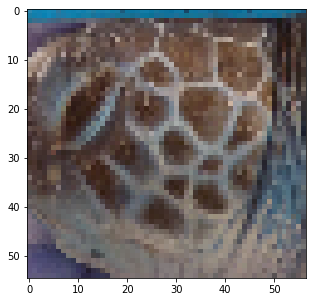

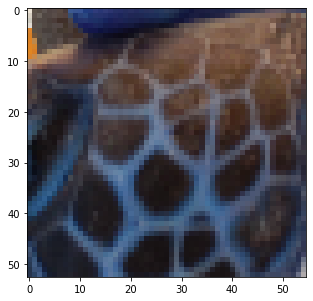

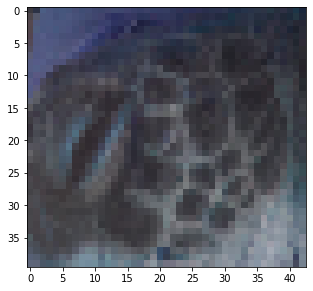

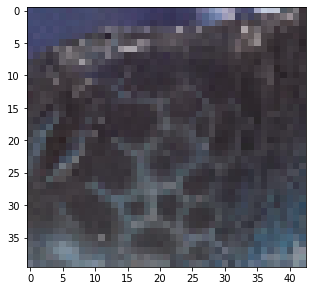

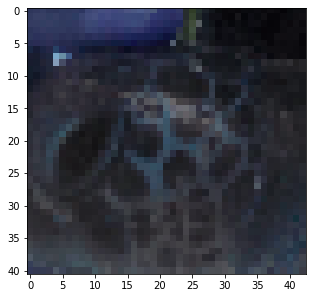

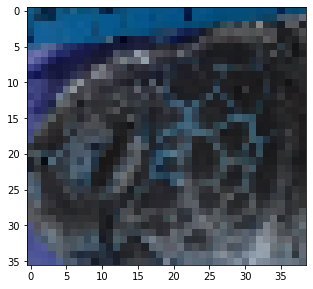

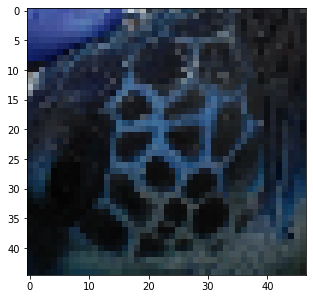

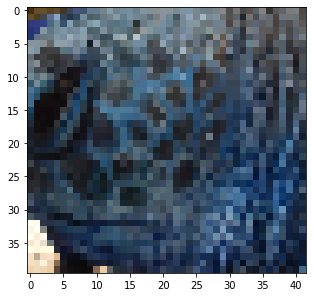

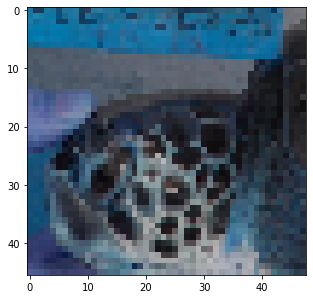

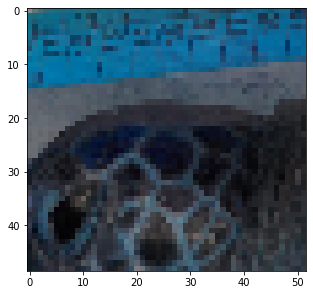

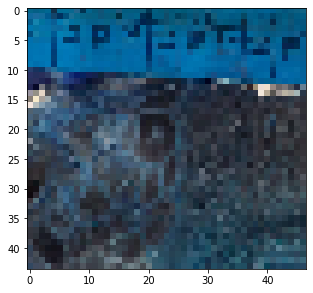

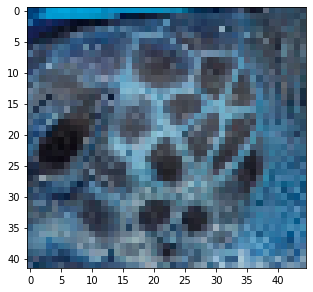

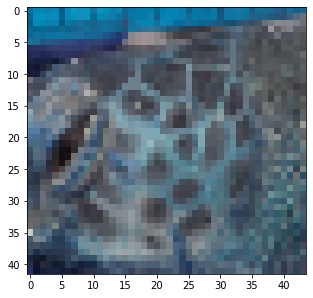

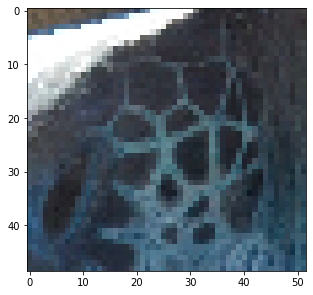

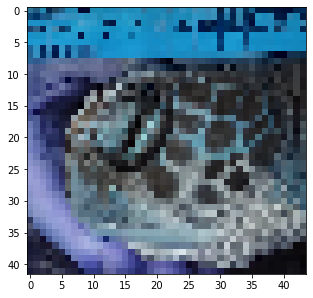

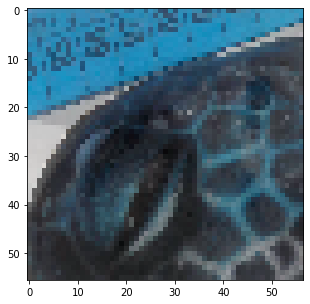

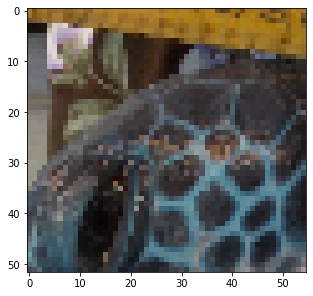

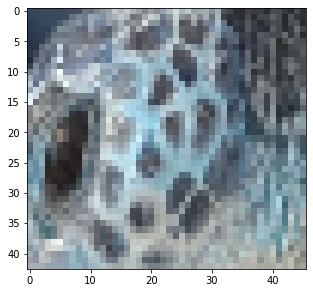

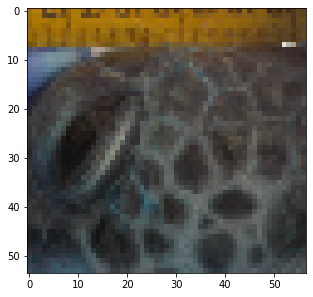

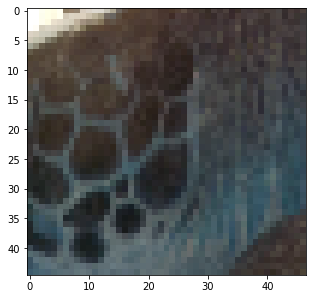

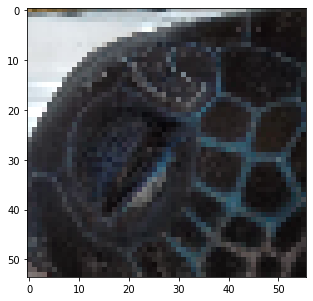

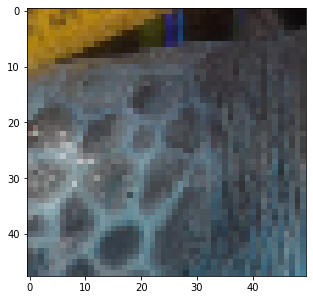

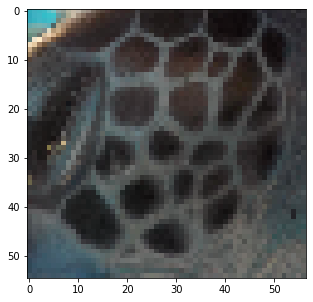

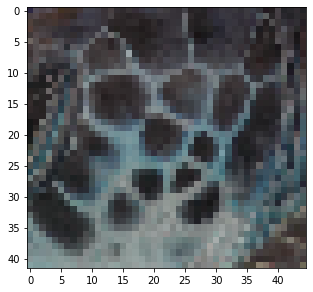

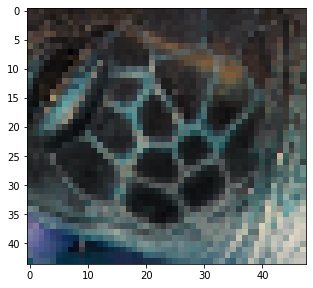

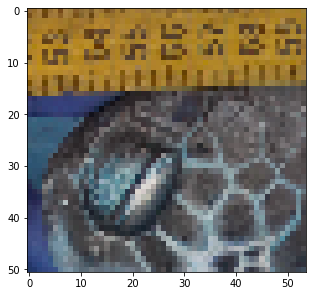

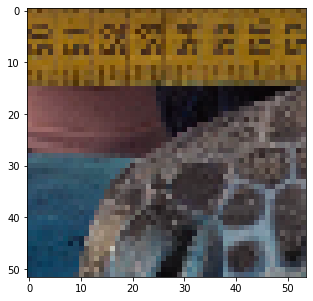

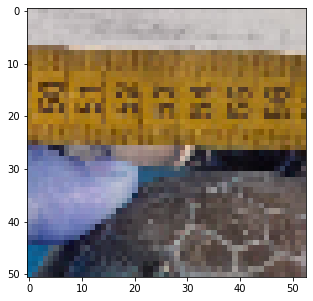

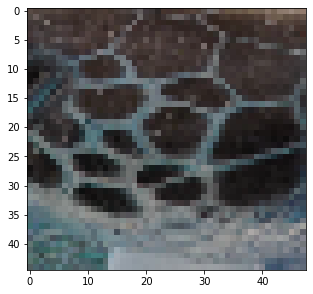

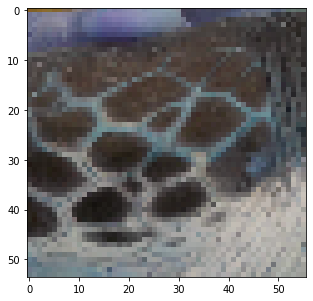

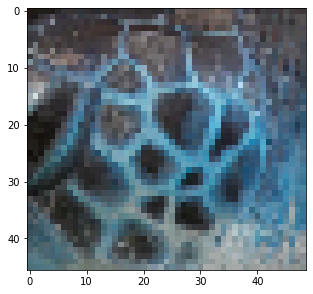

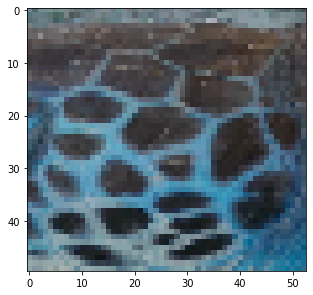

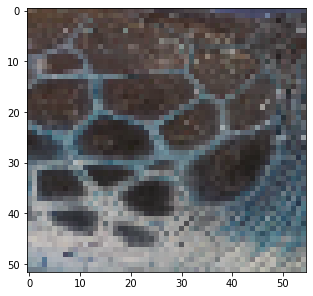

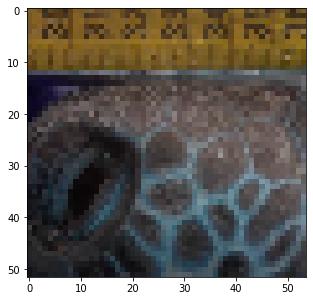

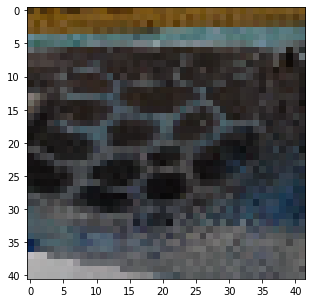

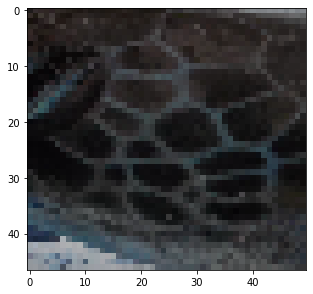

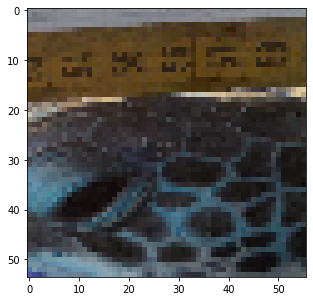

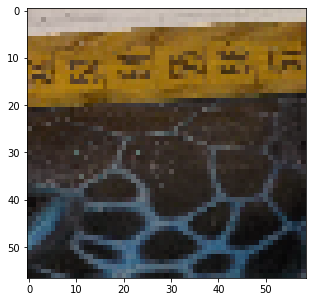

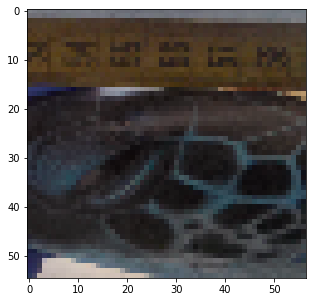

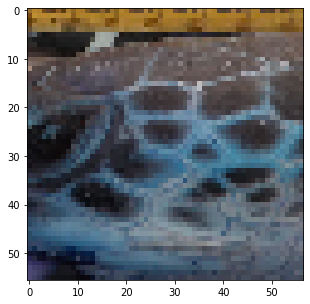

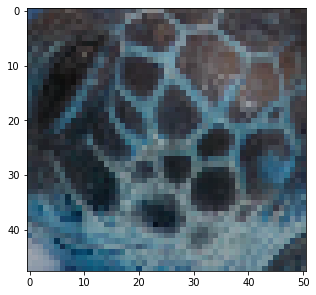

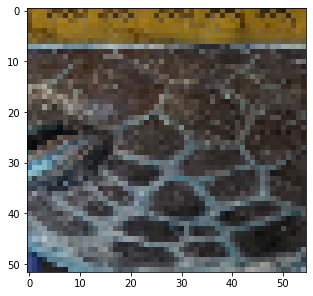

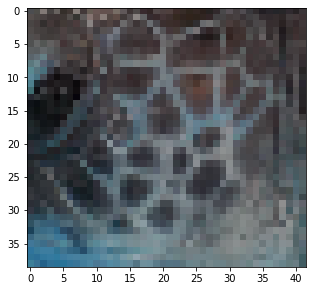

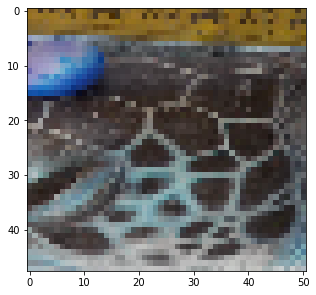

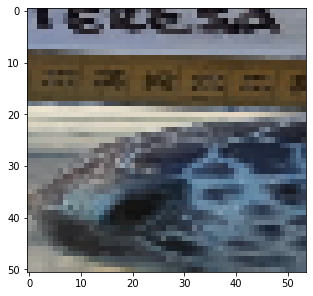

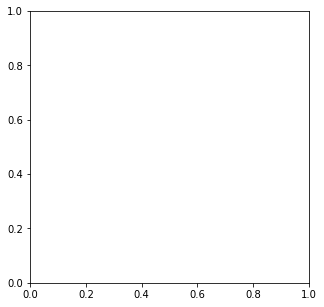

In [58]:
# Cambiar idx para ver diferentes imagenes
idxs = [20, 40, 50]


from matplotlib.pyplot import imshow
%matplotlib inline

for i in range(99):
    
    fig, ax = plt.subplots(figsize=(5,5))

    # Extraer la imagen y mostrarla
    im1 = resized_img[i]
    t = torch.from_numpy(im1)

#     ax.imshow(t)

    t2=t.permute([2,1,0]).unsqueeze(0)
    t2=t2.float()

    # Calcular la bounding box que predice la red, y la pérdida asociada
    with torch.no_grad():

        output = best_model(t2)
        # Dibujar la bounding box predicha a la imagen
#         bb_inference = output.reshape([2,2])
#         add_bb_to_axes(ax, bb_inference, color = 'blue')
        # Mostrar        
#         ax.set_title(f"Index:{lista_nombres[i]}", fontdict = {'fontsize':12})
#         plt.grid(None) 
#         print(output)
        
        xmin= output[0:1,0].numpy()[0]
        ymin = output[0:1,1].numpy()[0]
        xmax= output[0:1,2].numpy()[0]
        ymax= output[0:1,3].numpy()[0]
        
        
        img = Image.fromarray(resized_img[i])
        im1 = img.crop((xmin, ymin, xmax, ymax))
#         im1.save("recortes_automaticos/"+f"{lista_nombres[i]}.png")
        
#         im1.save('crop', 'png')
        # output.close()

        # Shows the image in image viewer
        plt.imshow(im1)